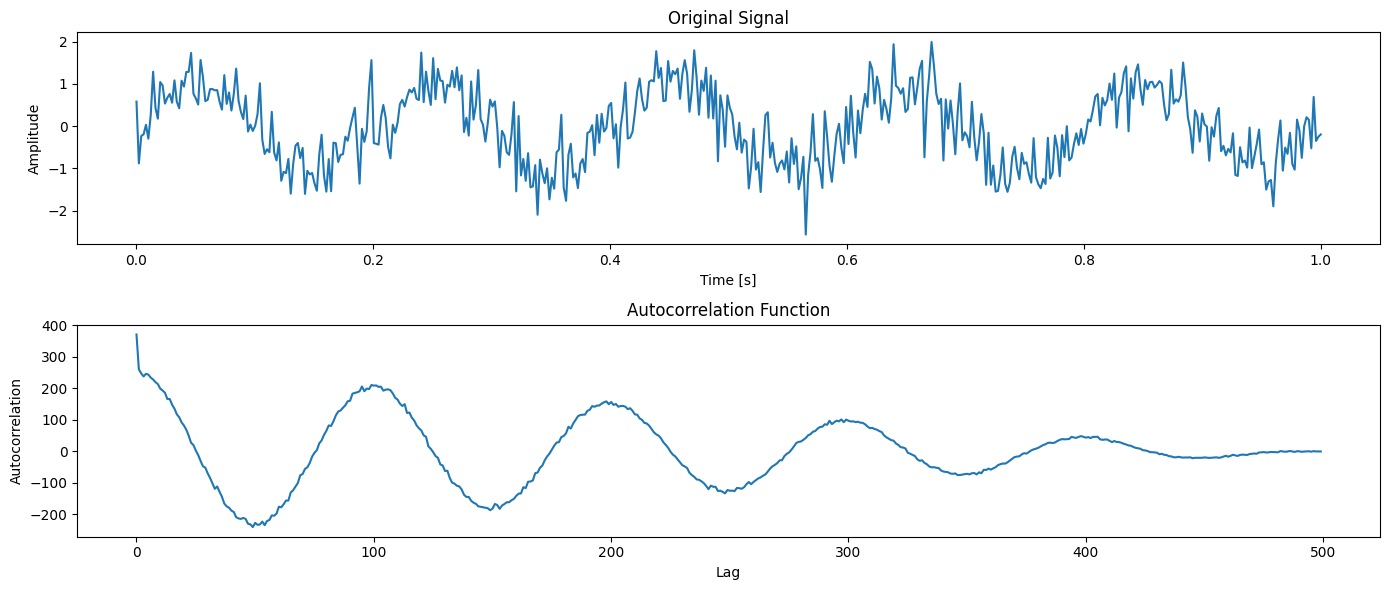

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import coherence, welch

# Function to compute the autocorrelation of a signal
def compute_autocorrelation(signal):
    n = len(signal)
    mean = np.mean(signal)
    autocorr = np.correlate(signal - mean, signal - mean, mode='full')
    return autocorr[n-1:]

# Example signal: a sine wave with some noise
t = np.linspace(0, 1, 500)
signal = np.sin(2 * np.pi * 5 * t) + np.random.normal(0, 0.5, t.shape)

# Compute the autocorrelation
autocorr = compute_autocorrelation(signal)

# Plot the original signal
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the autocorrelation function
plt.subplot(2, 1, 2)
lags = np.arange(len(autocorr))
plt.plot(lags, autocorr)
plt.title('Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

plt.tight_layout()
plt.show()

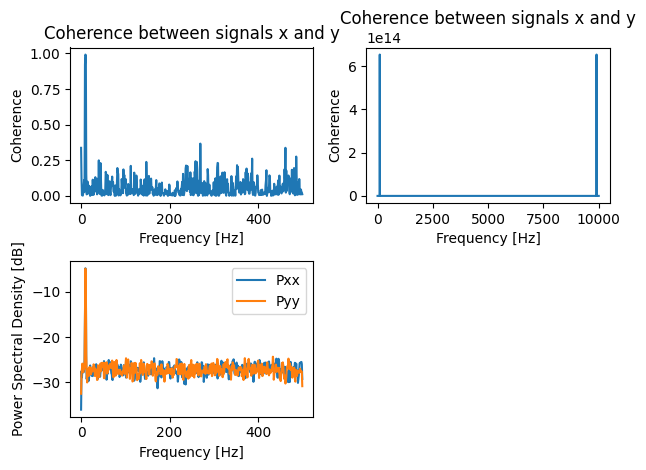

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import coherence, welch

# Generate sample data
fs = 1000  # Sampling frequency
t = np.linspace(0, 10, 10 * fs, endpoint=False)
x = np.sin(2 * np.pi * 10 * t) + np.random.normal(0, 1, len(t))
y = np.sin(2 * np.pi * 10 * t) + np.random.normal(0, 1, len(t))

# Compute coherence
f, Cxy = coherence(x, y, fs, nperseg=1024)

# Compute power spectral density
f, Pxx = welch(x, fs, nperseg=1024)
f, Pyy = welch(y, fs, nperseg=1024)

# Compute cross power spectral density
Pxy = np.abs(np.fft.fft(x) * np.conj(np.fft.fft(y)))**2

# Plot coherence
plt.figure()
plt.subplot(2, 2, 1)
plt.plot(f, Cxy)
plt.title('Coherence between signals x and y')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Coherence')

plt.subplot(2, 2, 2)
plt.plot(np.abs(Pxy))
plt.title('Coherence between signals x and y')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Coherence')

# Plot power spectral densities
plt.subplot(2, 2, 3)
plt.plot(f, 10 * np.log10(Pxx), label='Pxx')
plt.plot(f, 10 * np.log10(Pyy), label='Pyy')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density [dB]')
plt.legend()
plt.tight_layout()
plt.show()